In [39]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import lmfit
from lmfit.models import LinearModel, LorentzianModel
from uncertainties import unumpy as up
from uncertainties import ufloat
from uncertainties import wrap
import uncertainties as uc

In [40]:
def voigt1(x,s1,g1,o1,scale1):
    return scale1*scipy.special.voigt_profile(x-o1,s1,g1)#+a*x**2+b
def voigt2(x,s1,s2,g1,g2,o1,o2,scale1,scale2):
    return scale1*scipy.special.voigt_profile(x-o1,s1,g1)+scale2*scipy.special.voigt_profile(x-o2,s2,g2)#+a*x**2+b

In [41]:
def FWHM(s_p,g_p):
    s = ufloat(s_p.value,s_p.stderr)
    g = ufloat(g_p.value,g_p.stderr)
    fg=s*(8*up.log(2))**0.5
    fl=2*g
    return 0.5346*fl+((fg)**2+(0.2166*fl**2))**0.5

def uvoigt1(out_voigt):
    x_p,s1_p,g1_p,o1_p,scale1_p=out_voigt.result.params['o1'],out_voigt.result.params['s1'],out_voigt.result.params['g1'],out_voigt.result.params['o1'],out_voigt.result.params['scale1']
    x = ufloat(x_p.value,x_p.stderr)
    s1 = ufloat(s1_p.value,s1_p.stderr)
    g1 = ufloat(g1_p.value,g1_p.stderr)
    o1 = ufloat(o1_p.value,o1_p.stderr)
    scale1 = ufloat(scale1_p.value,scale1_p.stderr)
    uv=wrap(voigt1)
    return uv(x,s1,g1,o1,scale1)

def uvoigt2(out_voigt):
    x1_p,s1_p,g1_p,o1_p,scale1_p=out_voigt.result.params['o1'],out_voigt.result.params['s1'],out_voigt.result.params['g1'],out_voigt.result.params['o1'],out_voigt.result.params['scale1']
    x2_p,s2_p,g2_p,o2_p,scale2_p=out_voigt.result.params['o2'],out_voigt.result.params['s2'],out_voigt.result.params['g2'],out_voigt.result.params['o2'],out_voigt.result.params['scale2']
    x1 = ufloat(x1_p.value,x1_p.stderr)
    s1 = ufloat(s1_p.value,s1_p.stderr)
    g1 = ufloat(g1_p.value,g1_p.stderr)
    o1 = ufloat(o1_p.value,o1_p.stderr)
    scale1 = ufloat(scale1_p.value,scale1_p.stderr)
    x2 = ufloat(x2_p.value,x2_p.stderr)
    s2 = ufloat(s2_p.value,s2_p.stderr)
    g2 = ufloat(g2_p.value,g2_p.stderr)
    o2 = ufloat(o2_p.value,o2_p.stderr)
    scale2 = ufloat(scale2_p.value,scale2_p.stderr)


    uv=wrap(voigt2)

    p1 = uv(x1,s1,s2,g1,g2,o1,o2,scale1,scale2)
    p2 = uv(x2,s1,s2,g1,g2,o1,o2,scale1,scale2)
    return p1,p2

def uvoigt(out_voigt):
    try:
        return uvoigt2(out_voigt)
    except:
        return uvoigt1(out_voigt)

In [42]:
path =  'Data/SI_111_30_15.xy'
with open(path) as tf:
    data = np.loadtxt(tf,delimiter=" ").T

err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = (data[1,i])**0.5
data = np.vstack([data,err])

zu betrachtende intervalle:  
b1[25,26]->[667,733]  
a1[28,29]->[867,933]  
b2[52.4,53]->[2493,2533]  
a2[58.5,59.25]->[2900,2950]  
b3[83,84]->[4533,4600]  
a3[93,97]->[5200,5467]  5300:5367

In [43]:
for i in range(len(data[0])):
    if data[0,i]>=95.5:
        print(i)
        break

5367


In [44]:
#modell erstellen b1[25,26]->[667,733] 
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["o1"].set(value=25.6,min=25.5,max=25.75)
pars_voigt["scale1"].set(7000)

#Fitten
out_voigt = model_voigt.fit(data[1,667:733],x=data[0,667:733],params=pars_voigt,weights=1/data[2,667:733],nan_policy='propagate')
b1f=out_voigt.fit_report()
b1p=np.array([np.arange(25,26,0.001),out_voigt.eval(x=np.arange(25,26,0.001))])



print('Peakhöhe:'+str(uvoigt(out_voigt).format(":.5")))

print('FWHM:'+str(FWHM(out_voigt.result.params['s1'],out_voigt.result.params['g1']).format(":.5")))


Peakhöhe:75710+/-8583
FWHM:0.035749+/-0.004784


In [45]:
#modell erstellen a1[28,29]->[867,933]  
model_voigt = lmfit.model.Model(voigt2)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["s2"].set(value=0.0147,min=0,max=1)
pars_voigt["g2"].set(value=0.0147,min=0,max=1)
pars_voigt["o1"].set(value=28.4,min=28,max=29)
pars_voigt["o2"].set(value=28.5,min=28,max=29)
pars_voigt["scale1"].set(25000)
pars_voigt["scale2"].set(15000)
 
#Fitten
out_voigt = model_voigt.fit(data[1,867:933],x=data[0,867:933],params=pars_voigt,weights=1/data[2,867:933],nan_policy='propagate')
a1f=out_voigt.fit_report()
a1p=np.array([np.arange(28,29,0.001),out_voigt.eval(x=np.arange(28,29,0.001))])




print('Peakhöhe1:'+str(uvoigt(out_voigt)[0].format(":.5"))+" 2:"+str(uvoigt(out_voigt)[1].format(":.5")))

print('FWHM:'+str(FWHM(out_voigt.result.params['s1'],out_voigt.result.params['g1']).format(":.5")))
print('FWHM:'+str(FWHM(out_voigt.result.params['s2'],out_voigt.result.params['g2']).format(":.5")))


Peakhöhe1:(2.7535+/-0.3734)e+05 2:(1.3664+/-0.2599)e+05
FWHM:0.033297+/-0.004798
FWHM:0.038360+/-0.007009


In [46]:
#modell erstellen b2[52.4,53]->[2493,2533] 
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["o1"].set(value=52.67,min=52.4,max=53)
pars_voigt["scale1"].set(100)

#Fitten
out_voigt = model_voigt.fit(data[1,2493:2533],x=data[0,2493:2533],params=pars_voigt,weights=1/data[2,2493:2533],nan_policy='propagate')
b2f=out_voigt.fit_report()
b2p=np.array([np.arange(52.4,53,0.001),out_voigt.eval(x=np.arange(52.4,53,0.001))])



print('Peakhöhe:'+str(uvoigt(out_voigt).format(":.5")))

print('FWHM:'+str(FWHM(out_voigt.result.params['s1'],out_voigt.result.params['g1']).format(":.5")))

Peakhöhe:72.146+/-13.729
FWHM:0.099226+/-0.017563


In [47]:
#modell erstellen a2[58.5,59.25]->[2900,2950]2900:2950
model_voigt = lmfit.model.Model(voigt2)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["s2"].set(value=0.0147,min=0,max=1)
pars_voigt["g2"].set(value=0.0147,min=0,max=1)
pars_voigt["o1"].set(value=58.6,min=58.5,max=59.25)
pars_voigt["o2"].set(value=59,min=58.5,max=59.25)
pars_voigt["scale1"].set(25000)
pars_voigt["scale2"].set(15000)
 
#Fitten
out_voigt = model_voigt.fit(data[1,2900:2950],x=data[0,2900:2950],params=pars_voigt,weights=1/data[2,2900:2950],nan_policy='propagate')
a2f=out_voigt.fit_report()
a2p=np.array([np.arange(58.5,59.25,0.001),out_voigt.eval(x=np.arange(58.5,59.25,0.001))])




print('Peakhöhe1:'+str(uvoigt(out_voigt)[0].format(":.5"))+" 2:"+str(uvoigt(out_voigt)[1].format(":.5")))

print('FWHM:'+str(FWHM(out_voigt.result.params['s1'],out_voigt.result.params['g1']).format(":.5")))
print('FWHM:'+str(FWHM(out_voigt.result.params['s2'],out_voigt.result.params['g2']).format(":.5")))

Peakhöhe1:534.70+/-111.63 2:235+/-22774
FWHM:0.036885+/-0.009977
FWHM:0.0424+/-3.5803


In [48]:
#modell erstellen b3[83,84]->[4533,4600]
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["o1"].set(value=83.5,min=83,max=84)
pars_voigt["scale1"].set(100)

#Fitten
out_voigt = model_voigt.fit(data[1,4533:4600],x=data[0,4533:4600],params=pars_voigt,weights=1/data[2,4533:4600],nan_policy='propagate')
b3f=out_voigt.fit_report()
b3p=np.array([np.arange(83,84,0.001),out_voigt.eval(x=np.arange(83,84,0.001))])


print('Peakhöhe:'+str(uvoigt(out_voigt).format(":.5")))

print('FWHM:'+str(FWHM(out_voigt.result.params['s1'],out_voigt.result.params['g1']).format(":.5")))

Peakhöhe:3803.3+/-265.0
FWHM:0.087530+/-0.007854


In [49]:
#modell erstellen a3[93,97]->[5200,5467]  
model_voigt = lmfit.model.Model(voigt2)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["s2"].set(value=0.0147,min=0,max=1)
pars_voigt["g2"].set(value=0.0147,min=0,max=1)
pars_voigt["o1"].set(value=94.9,min=93,max=97)
pars_voigt["o2"].set(value=95.3,min=93,max=97)
pars_voigt["scale1"].set(25000)
pars_voigt["scale2"].set(15000)
 
#Fitten
out_voigt = model_voigt.fit(data[1,5200:5467],x=data[0,5200:5467],params=pars_voigt,weights=1/data[2,5200:5467],nan_policy='propagate')
a3f=out_voigt.fit_report()
a3p=np.array([np.arange(94.5,95.5,0.001),out_voigt.eval(x=np.arange(94.5,95.5,0.001))])



print('Peakhöhe1:'+str(uvoigt(out_voigt)[0].format(":.5"))+" 2:"+str(uvoigt(out_voigt)[1].format(":.5")))

print('FWHM:'+str(FWHM(out_voigt.result.params['s1'],out_voigt.result.params['g1']).format(":.5")))
print('FWHM:'+str(FWHM(out_voigt.result.params['s2'],out_voigt.result.params['g2']).format(":.5")))

Peakhöhe1:26614+/-25488 2:12162+/-12742
FWHM:0.054792+/-0.002045
FWHM:0.066674+/-0.002495


(52.0, 60.0)

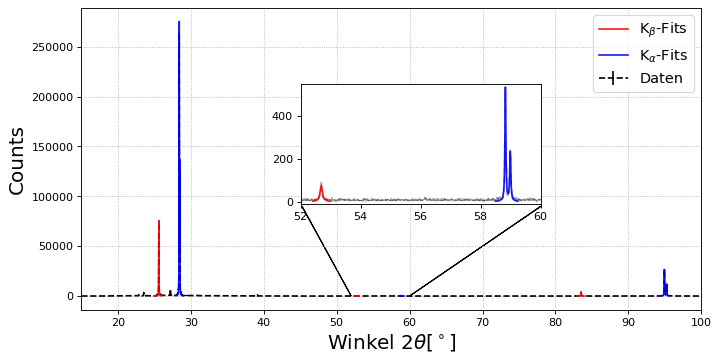

In [50]:
fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.errorbar(data[0],data[1],yerr=data[2],zorder=5,mfc='black',color='k',linestyle='--',label='Daten')
plt.plot(b1p[0],b1p[1],zorder=10,label='K'r'$_\beta$''-Fits',color='r',alpha=0.9)
plt.plot(a1p[0],a1p[1],zorder=10,label='K'r'$_\alpha$''-Fits',color='b',alpha=0.9)
plt.plot(b2p[0],b2p[1],zorder=10,color='r',alpha=0.9)
plt.plot(a2p[0],a2p[1],zorder=10,color='b',alpha=0.9)
plt.plot(b3p[0],b3p[1],zorder=10,color='r',alpha=0.9)
plt.plot(a3p[0],a3p[1],zorder=10,color='b',alpha=0.9)

plt.legend(fontsize=13)
plt.grid(axis='both',linestyle=':')
plt.xlim(15,100)
plt.ylabel("Counts",size=18)
plt.xlabel("Winkel 2"r"$\theta$"r'[$^\circ$]',size=18)
plt.arrow(45.25,90000,6.75,-90000)
plt.arrow(78,90000,-18,-90000)

# this is an inset axes over the main axes
a = plt.axes([.399, .39, .3, .3])
plt.plot(b2p[0],b2p[1],zorder=10,color='r',alpha=0.9)
plt.plot(a2p[0],a2p[1],zorder=10,color='b',alpha=0.9)
plt.errorbar(data[0],data[1],yerr=data[2],zorder=5,mfc='black',color='k',linestyle='--',alpha=0.2)
plt.ylim(-10,550)
plt.xlim(52,60)
#plt.savefig('plots_1-4_ohne/hauptplots/spek_30_15_ohne.pdf')

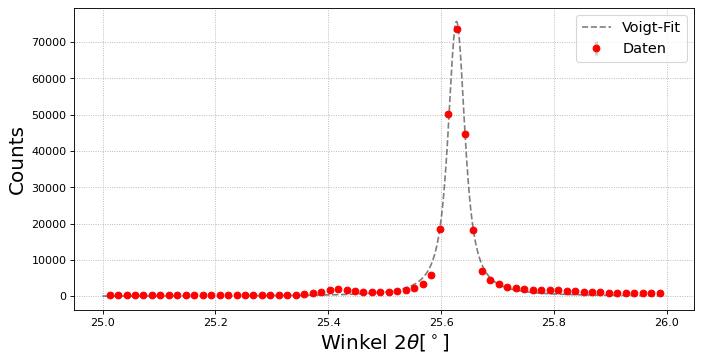

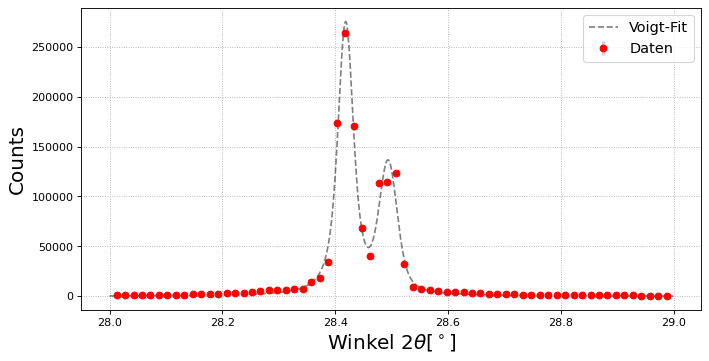

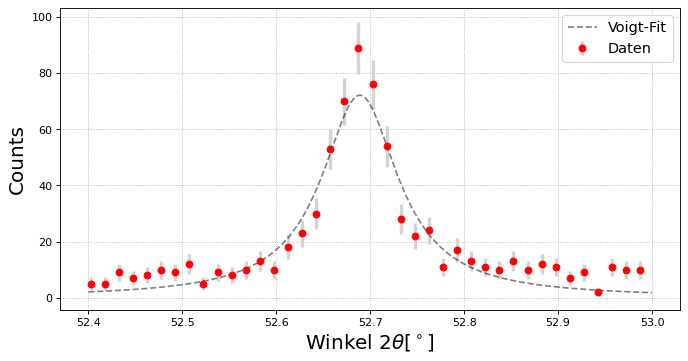

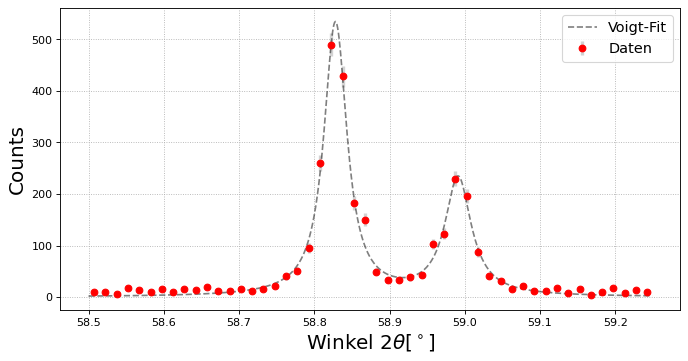

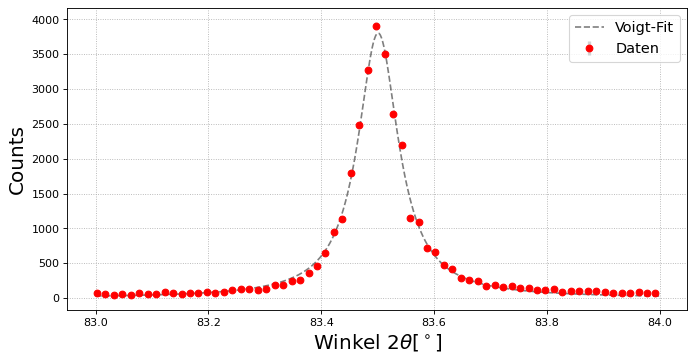

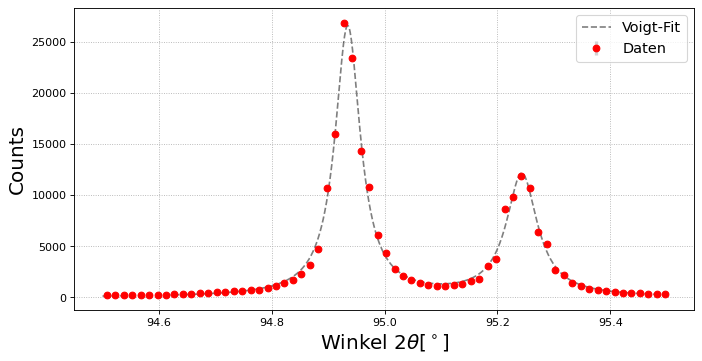

In [51]:
#plt.style.use('fivethirtyeight') #plt.savefig('plots_1-4_ohne/voigt_fit_30_15_ohne/.png')

fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.grid(axis='both',linestyle=':')
plt.errorbar(data[0,667:733],data[1,667:733],yerr=data[2,667:733],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=10,label="Daten")
plt.plot(b1p[0],b1p[1],zorder=10,color='k',linestyle='--',alpha=0.5,label="Voigt-Fit")
plt.ylabel("Counts",size=18)
plt.xlabel("Winkel 2"r"$\theta$"r'[$^\circ$]',size=18)
plt.legend(fontsize=13)
#plt.savefig('plots_1-4_ohne/voigt_fit_30_15_ohne/b1.pdf')


fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.grid(axis='both',linestyle=':')
plt.errorbar(data[0,867:933],data[1,867:933],yerr=data[2,867:933],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=10,label="Daten")
plt.plot(a1p[0],a1p[1],zorder=10,color='k',linestyle='--',alpha=0.5,label="Voigt-Fit")
plt.ylabel("Counts",size=18)
plt.xlabel("Winkel 2"r"$\theta$"r'[$^\circ$]',size=18)
plt.legend(fontsize=13)
#plt.savefig('plots_1-4_ohne/voigt_fit_30_15_ohne/a1.pdf')


fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.grid(axis='both',linestyle=':')
plt.errorbar(data[0,2493:2533],data[1,2493:2533],yerr=data[2,2493:2533],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=10,label="Daten")
plt.plot(b2p[0],b2p[1],zorder=10,color='k',linestyle='--',alpha=0.5,label="Voigt-Fit")
plt.ylabel("Counts",size=18)
plt.xlabel("Winkel 2"r"$\theta$"r'[$^\circ$]',size=18)
plt.legend(fontsize=13)
#plt.savefig('plots_1-4_ohne/voigt_fit_30_15_ohne/b2.pdf')


fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.grid(axis='both',linestyle=':')
plt.errorbar(data[0,2900:2950],data[1,2900:2950],yerr=data[2,2900:2950],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=10,label="Daten")
plt.plot(a2p[0],a2p[1],zorder=10,color='k',linestyle='--',alpha=0.5,label="Voigt-Fit")
plt.ylabel("Counts",size=18)
plt.xlabel("Winkel 2"r"$\theta$"r'[$^\circ$]',size=18)
plt.legend(fontsize=13)
#plt.savefig('plots_1-4_ohne/voigt_fit_30_15_ohne/a2.pdf')


fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.grid(axis='both',linestyle=':')
plt.errorbar(data[0,4533:4600],data[1,4533:4600],yerr=data[2,4533:4600],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=10,label="Daten")
plt.plot(b3p[0],b3p[1],zorder=10,color='k',linestyle='--',alpha=0.5,label="Voigt-Fit")
plt.ylabel("Counts",size=18)
plt.xlabel("Winkel 2"r"$\theta$"r'[$^\circ$]',size=18)
plt.legend(fontsize=13)
#plt.savefig('plots_1-4_ohne/voigt_fit_30_15_ohne/b3.pdf')


fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.grid(axis='both',linestyle=':')
plt.errorbar(data[0,5300:5367],data[1,5300:5367],yerr=data[2,5300:5367],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=10,label="Daten")
plt.plot(a3p[0],a3p[1],zorder=10,color='k',linestyle='--',alpha=0.5,label="Voigt-Fit")
plt.ylabel("Counts",size=18)
plt.xlabel("Winkel 2"r"$\theta$"r'[$^\circ$]',size=18)
plt.legend(fontsize=13)
#plt.savefig('plots_1-4_ohne/voigt_fit_30_15_ohne/a3.pdf')

In [52]:
print('b1#######################################')
print(b1f)
print('a1#######################################')
print(a1f)
print('b2#######################################')
print(b2f)
print('a2#######################################')
print(a2f)
print('b3#######################################')
print(b3f)
print('a3#######################################')
print(a3f)



b1#######################################
[[Model]]
    Model(voigt1)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 58
    # data points      = 66
    # variables        = 4
    chi-square         = 21386.1738
    reduced chi-square = 344.938288
    Akaike info crit   = 389.535781
    Bayesian info crit = 398.294400
[[Variables]]
    s1:      0.00624652 +/- 0.00247458 (39.62%) (init = 0.0137)
    g1:      0.01466611 +/- 0.00126542 (8.63%) (init = 0.0137)
    o1:      25.6274008 +/- 8.5134e-04 (0.00%) (init = 25.6)
    scale1:  3988.71883 +/- 145.258097 (3.64%) (init = 7000)
[[Correlations]] (unreported correlations are < 0.100)
    C(s1, g1) = -0.756
a1#######################################
[[Model]]
    Model(voigt2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 208
    # data points      = 66
    # variables        = 8
    chi-square         = 63949.7111
    reduced chi-square = 1102.58123
    Akaike info crit   = 469.829